### 1. Import and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOID,w_material_early,...,w_castled_early,b_castled_early,w_checks_early,b_checks_early,early_checks,w_piece_activity,b_piece_activity,both_castled_early,total_captures_early,activity_diff
0,2487,2596,1,0,109,2541.5,0,-109,0,20.0,...,1.0,0.0,4.0,2.0,6.0,36.0,36.0,0,15.0,0.0
1,2542,2433,2,0,109,2487.5,1,109,9,16.0,...,0.0,0.0,1.0,3.0,4.0,31.0,20.0,0,15.0,11.0
2,2404,2534,0,0,130,2469.0,0,-130,0,21.0,...,1.0,1.0,0.0,0.0,0.0,33.0,34.0,1,9.0,-1.0
3,2860,2922,1,0,62,2891.0,0,-62,0,33.0,...,1.0,0.0,0.0,0.0,0.0,39.0,39.0,0,4.0,0.0
4,2752,2395,2,0,357,2573.5,1,357,0,18.0,...,0.0,1.0,0.0,1.0,1.0,38.0,28.0,0,14.0,10.0


### 2. Prepare data

In [3]:
X = df.drop('ResultNumeric', axis=1)
y = df['ResultNumeric']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (2435474, 33)
Target: (2435474,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,
    stratify=y
)

### 4. Train model

In [5]:
dt_model = DecisionTreeClassifier(
    max_depth=20,              # Same as Random Forest for fair comparison
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

In [6]:
start_time = time.time()

dt_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training completed in 36.30 seconds (0.61 minutes)


### 5. Evaluate

In [7]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")

print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Black Win', 'Draw', 'White Win']))

Accuracy: 0.5922 (59.22%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.57      0.65      0.61    198257
        Draw       0.65      0.30      0.41     77234
   White Win       0.60      0.64      0.62    211604

    accuracy                           0.59    487095
   macro avg       0.61      0.53      0.55    487095
weighted avg       0.60      0.59      0.58    487095



### 6. Confusion Matrix

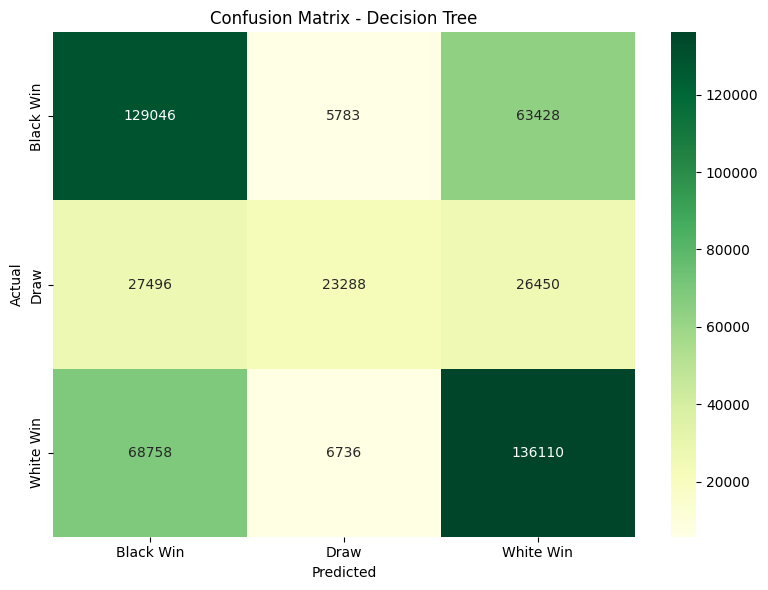

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn',
            xticklabels=['Black Win', 'Draw', 'White Win'],
            yticklabels=['Black Win', 'Draw', 'White Win'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()

### 7. Feature Importance


Feature Importance:
                  Feature  Importance
10    material_diff_early    0.220319
4               AvgRating    0.209710
6    WhiteRatingAdvantage    0.151554
3              RatingDiff    0.061846
32          activity_diff    0.037511
0                WhiteElo    0.033037
1                BlackElo    0.031633
29       b_piece_activity    0.024978
28       w_piece_activity    0.021281
8        w_material_early    0.021264
2             EventTypeID    0.016207
9        b_material_early    0.015537
15     b_aggression_early    0.014784
7                   ECOID    0.014079
16  aggression_diff_early    0.012975
19            center_diff    0.009486
13     capture_diff_early    0.009059
27           early_checks    0.008891
14     w_aggression_early    0.008887
22       development_diff    0.008731
26         b_checks_early    0.007867
18       b_center_control    0.007463
17       w_center_control    0.007140
21          b_development    0.006509
11       w_captures_early    

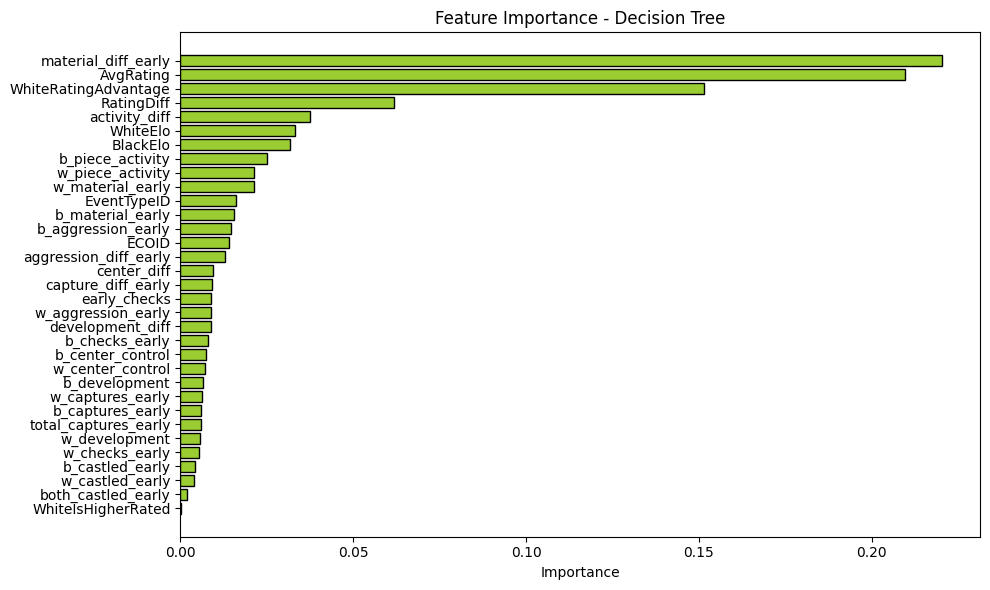

In [9]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'],
         color='yellowgreen', edgecolor='black')
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()